<a href="https://colab.research.google.com/github/Sanket758/Machine-Learning-Projects/blob/master/Creative_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understand the problem statement  


*   CREATIVE AI is a new branch of AI, in which AI can create paintings, write compelling stories and compose new music
*   Check out the world's largest community of artist exploring impact of AI on art: [aiartist.org](https://aiartists.org)

# What is Deep Dream?


*   Deep dream is an AI algorithm developed by Alex Mordvinsev at Google.
*   Ever wondered what does an AI see? (in the hidden layers)
*   The algorith works by creating a dream-like effect.
*   Remember when you were a kid looking at the clouds and trying to interpret shapes?  
*   DeepDream does the same thing by boosting the patterns it sees in a given image based on what it has been trained to see.
*   If a network has been trained to see animals in images, it will try to extract animal features in any given image.






# Import libraries and dataset

In [1]:
# Loading dataset
#!unzip '/content/drive/My Drive/Creative AI/Creative+AI+Dataset.zip' 

Archive:  /content/drive/My Drive/Creative AI/Creative+AI+Dataset.zip
   creating: Creative AI Dataset/
  inflating: Creative AI Dataset/eiffel.jpg  
  inflating: Creative AI Dataset/mars.jpg  
  inflating: Creative AI Dataset/mars_eiffel.avi  
  inflating: Creative AI Dataset/mars_eiffel.zip  


In [3]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from PIL import Image
import cv2
import random

import warnings
warnings.filterwarnings('ignore')

In [3]:
tf.__version__

'2.3.0'

In [4]:
# Loading a pretrained inceptionnet model - Transfer learning
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
base_model.summary()

87916544/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________

In [5]:
# Loading two images and blending them together in one image
img1 = Image.open('/content/Creative AI Dataset/mars.jpg')

img2 = Image.open('/content/Creative AI Dataset/eiffel.jpg')

#Blending the images
new_img = Image.blend(img1, img2, alpha=0.5)
# Save the blended image
new_img.save('img_0.jpg')

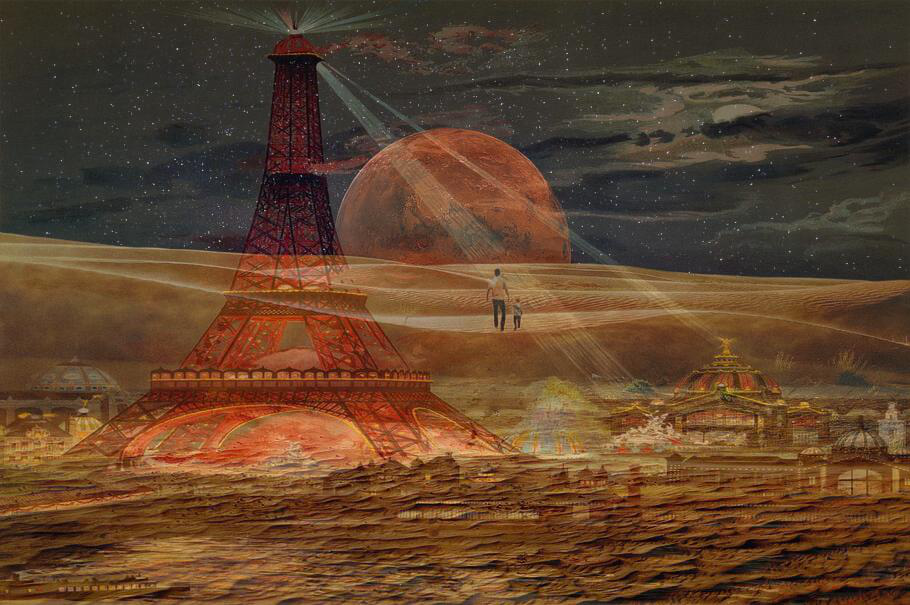

In [6]:
# Load the blended image
sample_image = tf.keras.preprocessing.image.load_img('img_0.jpg')
sample_image

In [7]:
np.shape(sample_image) #check the dimensions

(605, 910, 3)

In [8]:
type(sample_image)

PIL.JpegImagePlugin.JpegImageFile

In [9]:
# Converting image to a numpy array
sample_img = tf.keras.preprocessing.image.img_to_array(sample_image)
type(sample_img)

numpy.ndarray

In [10]:
# checking if image is normalized or not
print(f'Min pixel value={sample_img.min()}, Max pixel value={sample_img.max()}')

Min pixel value=0.0, Max pixel value=255.0


In [11]:
# Normalize the image 
sample_img = np.array(sample_img) / 255.
sample_img.shape

(605, 910, 3)

In [12]:
# again checking if image is normalized or not
print(f'Min pixel value={sample_img.min()}, Max pixel value={sample_img.max()}')

Min pixel value=0.0, Max pixel value=1.0


In [13]:
sample_img = tf.expand_dims(sample_img, axis=0)
np.shape(sample_img)

TensorShape([1, 605, 910, 3])

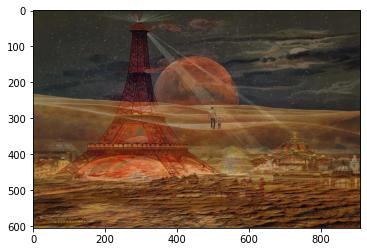

In [14]:
plt.imshow(tf.squeeze(sample_img, axis=0));

In [15]:
# Getting the activations of few hidden layers
names = ['mixed3', 'mixed5', 'mixed7']
layers = [base_model.get_layer(name).output for name in names]

# create a feature extraction model
deepdream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)
deepdream_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [16]:
# Lets run the model by feeding our input image
activations = deepdream_model(sample_img)
activations

[<tf.Tensor: shape=(1, 36, 55, 768), dtype=float32, numpy=
 array([[[[0.        , 0.        , 0.        , ..., 0.02111783,
           0.42713752, 0.30679747],
          [0.        , 0.13667202, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.25661922, 0.        , ..., 0.        ,
           0.07347673, 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.42646694,
           0.        , 0.        ],
          [0.05945684, 0.        , 0.        , ..., 0.42646694,
           0.6412617 , 0.        ]],
 
         [[0.67514175, 0.        , 0.        , ..., 0.02111783,
           0.28741282, 0.65448624],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.22241244],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
        

In [17]:
len(activations)

3

In [18]:
# names = ['mixed3', 'mixed5','mixed7','mixed9']
# layers = [base_model.get_layer(name).output for name in names]

# # create a feature extraction model
# deepdream_model2 = tf.keras.Model(inputs=base_model.input, outputs=layers)
# activations = deepdream_model2(sample_img)
# len(activation)

# Understand how deep dream algorithm works
*   If you feed an image to a CNN, the first layers generally detect low-level features such as edges.
*   As you go deeper in the network,higher level features are then detected such as faces, trees and cars.
*   'The final few layers assemble those into complete interpretations- these neurons activate in response to very complex things such as entire building or trees'.
*   What if you ask a certain layer to improve what it detects in an image?
*   what if you ask first couple of layers that are experts in detecting edges to maximize what they see?
*   Things get really dreamy and amazing! That's what google named: 'inceptionism'.
*   When you feed in an image to a trained ANN, the neurons fire and generate activations.
*   The deep dream algorithm works by trying to change the input image in a way that would make some of these neurons fire more. You can select which neurons in which layer you are interested in making them fire more prominently.
*   The process is continuosly repeated until the input image now contains all features that specific layer was originally looking for.


# DEEP DREAM ALGORITHM STEPS: 

1. Forward an image through a trained ANN, CNN, ResNet..etc.

2. Select a layer of choice (first layers capture edges, deep layers capture full shapes such as faces).

3. Calculate the activations (output) coming out from the
layer of interest.

4. Calculate the gradient of the activations with respect to
the input image.

5. Modify the image to increase these activations, and thus enhance the patterns seen by the network
resulting in trippy hallucinated image!

6. Iterate and repeat over multiple scales.

CREDITS:   
The DeepDream Code has been adopted from Keras Documentation:
https://www.tensorflow.org/tutorials/generative/deepdream

# Understand and perform Grdient calculations using tf.GradientTape()


1.   tf.GradientTape() is used to perform operations for automatic differentiation
2.   For example, Let's assume we have the following function y=x^3.
3.   The gradient at x=2, can be computed as follows: dy_dx = 3 * x^2 = 3 * 2 ^ 2 = 12



In [19]:
x = tf.constant(2.0)

In [20]:
with tf.GradientTape() as g:
    g.watch(x)
    y = x * x * x
    dy_dx = g.gradient(y,x) # will compute to 12

In [21]:
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

In [22]:
x = tf.constant(5.0)

with tf.GradientTape() as g:
    g.watch(x)
    y = x**4 + x**5
    dy_dx = g.gradient(y, x)

print(dy_dx)

tf.Tensor(3625.0, shape=(), dtype=float32)


In [23]:
(4 * (5**3)) + (5* (5**4)) # Calculating gradient manually

3625

# Implementing DeepDream Algorithm

## Define loss function

In [24]:
sample_img.shape

TensorShape([1, 605, 910, 3])

In [25]:
Sample_img = tf.squeeze(sample_img, axis=0)
Sample_img.shape

TensorShape([605, 910, 3])

In [26]:
def calc_loss(image, model):
    img_batch = tf.expand_dims(image, axis=0) # convert into batch format
    # gettimg layer activations
    layer_activations = model(img_batch) 
    print('Activation values (Layer output)= \n', layer_activations)
    
    losses = []
    for act in layer_activations:
        loss = tf.math.reduce_mean(act)
        losses.append(loss)
    
    print('Losses (from multiple activation layers)=', losses) # print losses
    print('Losses shape(from multiple activation layers=', np.shape(losses))
    print('Sum of all losses (from selected layers)=',tf.reduce_sum(losses)) 

    return tf.reduce_sum(losses) # return sum of losses

In [27]:
loss = calc_loss(tf.Variable(Sample_img), deepdream_model)
loss # sum of losses

Activation values (Layer output)= 
 [<tf.Tensor: shape=(1, 36, 55, 768), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.02111783,
          0.42713752, 0.30679747],
         [0.        , 0.13667202, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.25661922, 0.        , ..., 0.        ,
          0.07347673, 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.42646694,
          0.        , 0.        ],
         [0.05945684, 0.        , 0.        , ..., 0.42646694,
          0.6412617 , 0.        ]],

        [[0.67514175, 0.        , 0.        , ..., 0.02111783,
          0.28741282, 0.65448624],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.22241244],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
       

<tf.Tensor: shape=(), dtype=float32, numpy=0.5577076>

In [28]:
loss.numpy() 

0.5577076

## Calculating gradients

In [29]:
@tf.function
def deepdream(model, image, step_size):
    with tf.GradientTape() as tape:
        tape.watch(image)
        loss = calc_loss(image, model) # calculate loss

        #calculate gradients
        gradients = tape.gradient(loss, image)

        print('Gradients=\n', gradients)
        print('Gradients shape=\n', np.shape(gradients))

        # Dividing the gradients by standard dev
        gradients /= tf.math.reduce_std(gradients)

        # Gradient ascent, the loss is maximised so that the input image increasingly 'excites' the layers.
        # Update the image
        image = image + gradients * step_size
        image = tf.clip_by_value(image,-1, 1)

        return loss, image

In [30]:
# Utility function to deprocess an image, we will need this later
def deprocess(image):
    image = 255*(image+1.0)/2.0
    return tf.cast(image, tf.uint8)

In [31]:
def deep_dream_simple(model, image, steps=100, step_size=0.01):
    image = tf.keras.applications.inception_v3.preprocess_input(image)

    for step in range(steps):
        loss, image = deepdream(model, image, step_size)

        if step%100==0:
            plt.figure(figsize=(15,20))
            plt.imshow(deprocess(image))
            plt.show()
            print(f'Step {step}, loss {loss}')
    
    plt.figure(figsize=(12,12))
    plt.imshow(deprocess(image))
    plt.show()

    return deprocess(image)

In [32]:
Sample_img.shape

TensorShape([605, 910, 3])

In [ ]:
# Let's load the image and apply deep dream algorithms
input_img = np.array(tf.keras.preprocessing.image.load_img('img_0.jpg'))
dream_img = deep_dream_simple(model=deepdream_model, image=input_img, steps=500, step_size=0.001)

# Generated images for a video

In [34]:
input_image = tf.keras.preprocessing.image.load_img('img_0.jpg')    

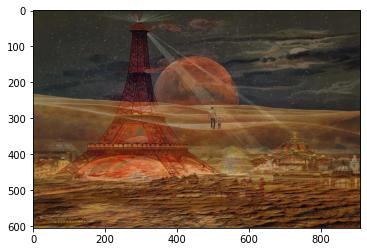

In [35]:
plt.imshow(input_image)

In [5]:
# Creating a folder
dream_name = 'mars_eiffel'

# Blended image dimensions 
x_size = 910
y_size = 605

# Define counters
max_count=100

In [37]:
!mv '/content/img_0.jpg' '/content/drive/My Drive/Creative AI/mars_eiffel/'

In [38]:
def load_image(filename):
    image = Image.open(filename)
    return np.float32(image)

In [ ]:
for i in range(max_count):
    if os.path.isfile('/content/drive/My Drive/Creative AI/{}/img_{}.jpg'.format(dream_name, i+1)):
        print('{} present already, continue fetching the images....'.format(i+1))
    else: 
        img_result = load_image(r'/content/drive/My Drive/Creative AI/{}/img_{}.jpg'.format(dream_name, i))

        # Zoom the image
        x_zoom = 2
        y_zoom = 1

        # removing edges of the image and resize
        img_result = img_result[0+x_zoom:y_size-y_zoom,0+y_zoom: x_size-x_zoom]
        img_result = cv2.resize(img_result, (x_size, y_size))

        # Adjust the rgb channels
        img_result[:,:,0] += 2 # red
        img_result[:,:,1] += 2 # green
        img_result[:,:,2] += 2 # blue

        # feed the image to Deep dream model
        img_result = deep_dream_simple(model=deepdream_model, image=img_result, steps= 100, step_size=0.001)

        # Clip the image
        img_result = np.clip(img_result, 0., 255.)
        img_result = img_result.astype(np.uint8)
        result = Image.fromarray(img_result, mode='RGB')

        # Save the image into the folder
        result.save(r'/content/drive/My Drive/Creative AI/{}/img_{}.jpg'.format(dream_name, i+1))

# Create the video


In [6]:
# Define the codec and create VideoWriter object 
# Download FFmpeg 

fourcc = cv2.VideoWriter_fourcc(*'XVID') # FourCC is a 4-byte code used to specify the video codec

out = cv2.VideoWriter('deepdreamvideo.avi', fourcc , 5.0, (910, 605)) # Specify the fourCC, frames per second (fps),
                                                                            # and frame size
# The frames per second value is depends on few important things
# 1. The number of frames we have created. Less number of frames brings small fps
# 2. The larger the image the bigger the fps value. For example, 1080 pixel image can bring 60 fps 

dream_path = '/content/drive/My Drive/Creative AI/mars_eiffel'
for i in range(max_count):
    
    # Build the frames of cv2.VideoWriter
    img_path = os.path.join(dream_path,'img_{}.jpg'.format(i)) # join the dream path
    
    print(img_path) # print the image path 
    
    frame = cv2.imread(img_path)
    out.write(frame)

out.release()

/content/drive/My Drive/Creative AI/mars_eiffel/img_0.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_1.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_2.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_3.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_4.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_5.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_6.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_7.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_8.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_9.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_10.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_11.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_12.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_13.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_14.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_15.jpg
/content/drive/My Drive/Creative AI/mars_eiffel/img_16.jpg
/conten

In [7]:
from google.colab import files
files.download('deepdreamvideo.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>